In [2]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_wave_eq import gram_Matrix_jax,k_ff_jax, k_fu_jax, k_uf_jax, k_uu
import numpy as np
import matplotlib.pyplot as plt

 /Users/tobileitgeb/Code/Code_bac/final_examples/wave_equation/../../PI_GP_regressor/main_class.py:913: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/wave_equation/../../PI_GP_regressor/main_class.py:925: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/wave_equation/../../PI_GP_regressor/main_class.py:1002: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/wave_equation/../../PI_GP_regressor/main_class.py:1014: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


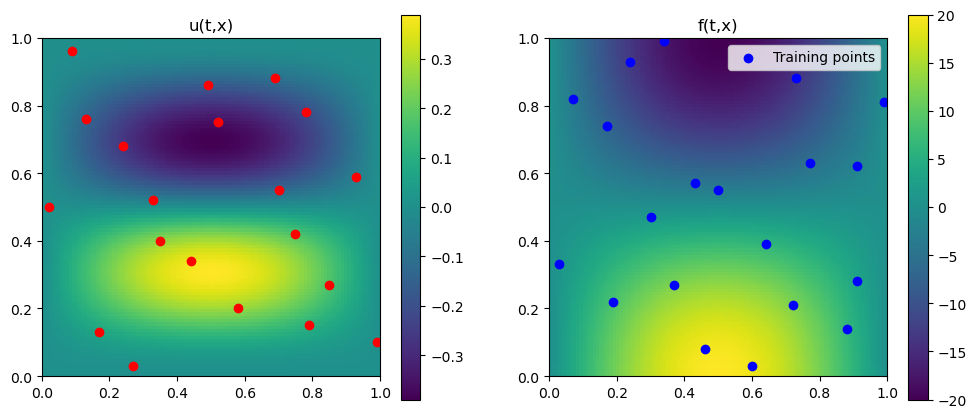

In [3]:
kernel_list = [gram_Matrix_jax, k_uu, k_uf_jax, k_fu_jax, k_ff_jax]
hyperparameters = ["l_x", "sigma_f","l_t", "c"]
model_wave_equation = PhysicsInformedGP_regressor(kernel_list,timedependence=True, params=hyperparameters,Dimensions=2)
model_wave_equation.set_name_kernel("Wave_equation")

n_training_points = 20
noise = [1e-8,1e-8]
model_wave_equation.set_training_data("wave_second.csv",n_training_points, noise)
n_validation_points = 500  #for calculating the MSE
model_wave_equation.set_validation_data(n_validation_points)
model_wave_equation.plot_raw_data(True,True)

In [ ]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-1.3,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((4))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lx
    theta_initial[1] = rng.uniform(0, 1, 1)               #sigma_f
    theta_initial[2] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lt
    theta_initial[3] = rng.uniform(1, 4, 1)               #c
    return theta_initial
n_restarts = 100
n_threads = -1
opt_params_dict = {'theta_initial': get_initial_values,   #needed for all optimization methods
                    'bounds': ((1e-2, None), (1e-5, None), (1e-3, None),(1e-2, None)), #needed for TNC and L-BFGS-B
                    'gtol': 1e-6}
model_wave_equation.train("Nelder-Mead",n_restarts, n_threads,opt_params_dict)

In [4]:
n_test_points = 100
x_star, t_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.reshape(-1, 1), t_star.reshape(-1, 1)))
model_wave_equation.predict_model(X_star)

Traced<ShapedArray(float32[20,20])>with<DynamicJaxprTrace(level=2/0)>
Traced<ShapedArray(float32[10000,20])>with<DynamicJaxprTrace(level=1/0)>


No handles with labels found to put in legend.


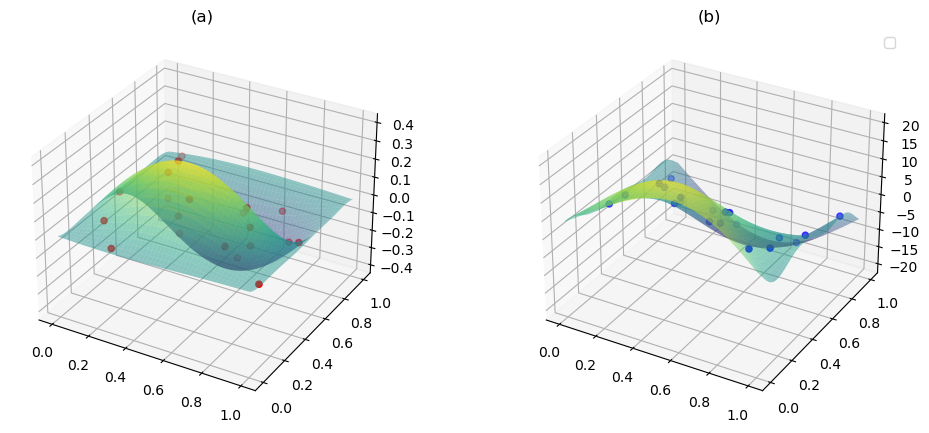

In [5]:
model_wave_equation.plot_prediction(X_star, "Predictive mean $\\overline{ f_*}$", "predictive_mean.png",heat_map=False)

Traced<ShapedArray(float32[10201,20])>with<DynamicJaxprTrace(level=1/0)>
-----------------------------------------------
GP with kernel: 
Training data: (20, 2)
Training targets: (40, 1)
Hyperparameters: {'l_x': 0.6857661491932379, 'sigma_f': 0.35371570435102484, 'l_t': 0.23567968709826342, 'c': 3.0038060138563463}
Log marginal likelihood: 18.820045471191406
Mean squared error: {'u': 8.545315722585656e-06, 'f': 0.895950436592102}
Relative l2 error: {'u': 0.01647330081745681, 'f': 0.09465930471969851}
-----------------------------------------------



 /Users/tobileitgeb/Code/Code_bac/final_examples/wave_equation/../../PI_GP_regressor/main_class.py:677: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/wave_equation/../../PI_GP_regressor/main_class.py:686: RuntimeWarning:invalid value encountered in sqrt


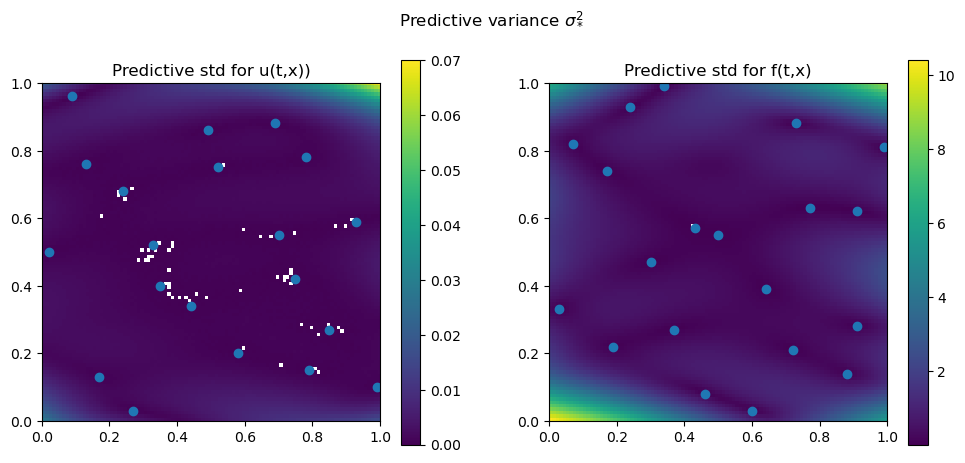

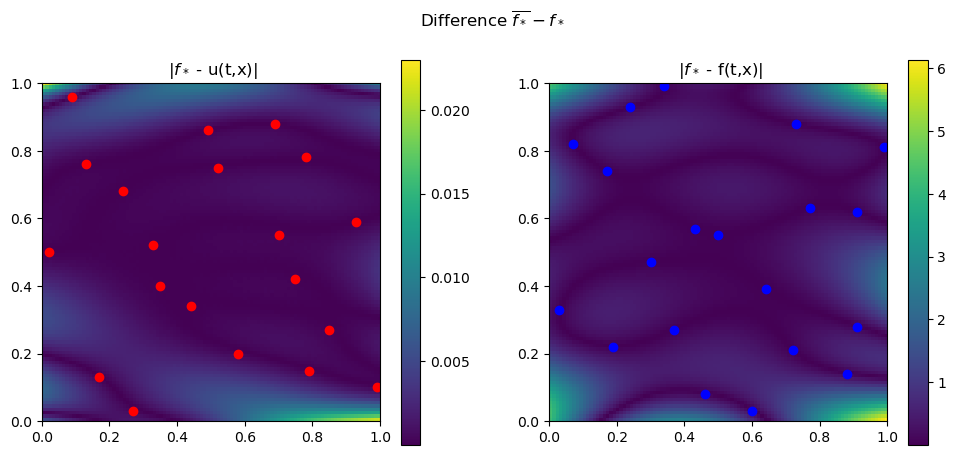

In [6]:
model_wave_equation.error()
print(model_wave_equation)
model_wave_equation.plot_variance(X_star, "Predictive variance $\\sigma_*^2$", "predictive_variance.png")
model_wave_equation.plot_difference( "Difference $\\overline{ f_*} - f_*$", "difference.png")

Now the same thing with GPy and a classical RBF kernel

In [7]:
model_wave_equation.use_GPy(X_star,"GPy",False)


 /opt/homebrew/anaconda3/envs/bac/lib/python3.8/site-packages/GPy/core/__init__.py:80: FutureWarning:In the future `np.bool` will be defined as the corresponding NumPy scalar.


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

MSE_u:  0.00032295008560476656
MSE_f:  0.0009367981485321695
relative error u:  0.10127081754392099
relative error f:  0.003060865876656323


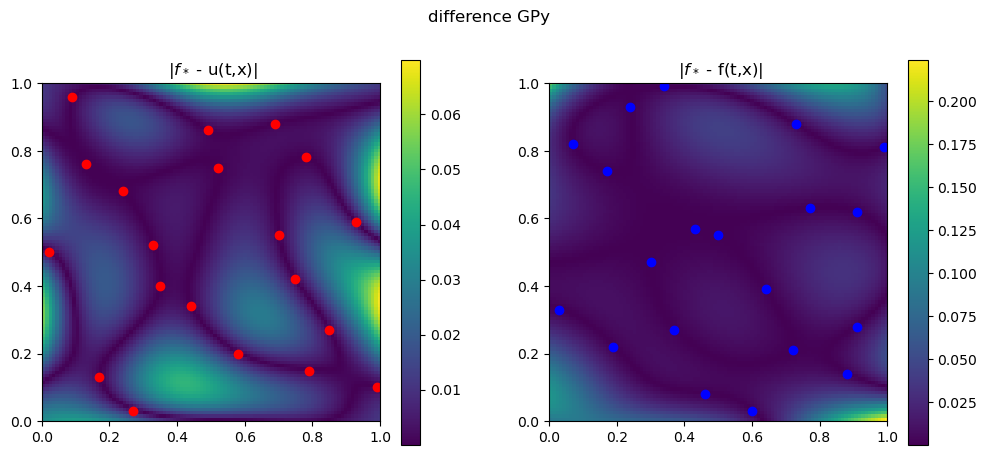

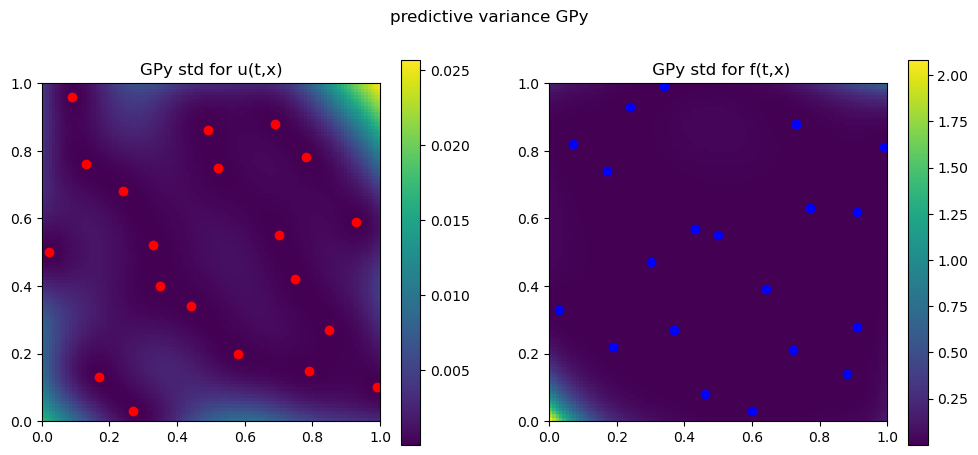

In [ ]:
model_wave_equation.plot_difference_GPy("difference GPy ", "GPy_difference.png")
model_wave_equation.plot_variance_GPy("predictive variance GPy ", "GPy_variance.png")

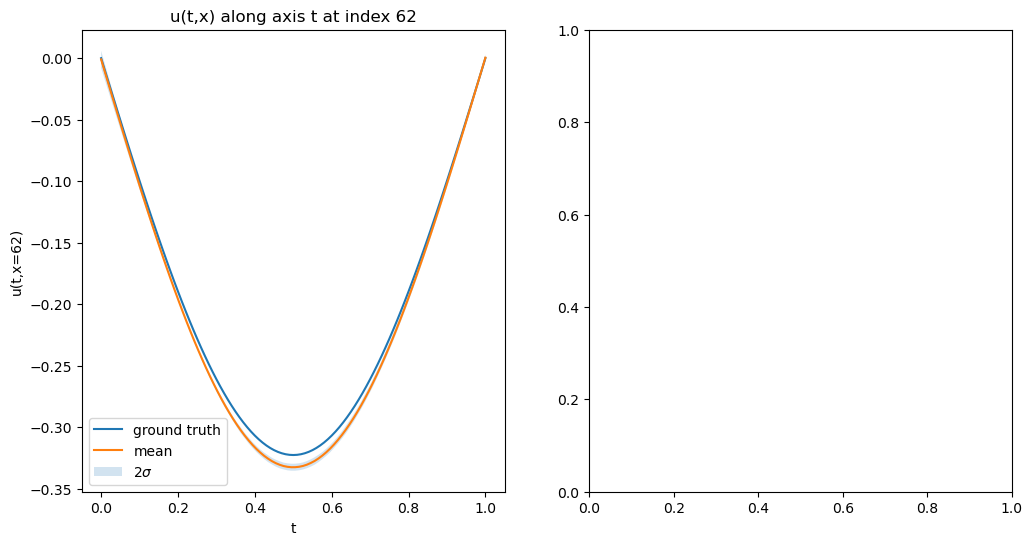

In [ ]:
model_wave_equation.plot_1d_cut([0,62],"")